# 프로젝트 실습 #3: Ford 엔진

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff

## 1. 데이터 불러오기

In [2]:
file_path = './dataset/'
train_fn ='FordA_TRAIN.arff'
test_fn = 'FordA_TEST.arff'

In [3]:
def read_ariff(path):
    
    raw_data, meta = loadarff(path)
    cols = [x for x in meta]
    data2d = np.zeros([raw_data.shape[0],len(cols)])
    for i,col in zip(range(len(cols)),cols):
        data2d[:,i]=raw_data[col]
    return data2d

In [4]:
train = read_ariff(file_path + train_fn)
test = read_ariff(file_path + test_fn)

data = np.concatenate((train, test), axis=0)
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1.0
1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1.0
2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1.0
3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1.0
4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,-1.0


In [5]:
df.shape

(4921, 501)

## 2. 데이터 전처리 및 EDA

In [6]:
df.iloc[:, 500].value_counts()

-1.0    2527
 1.0    2394
Name: 500, dtype: int64

/Users/nowave/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


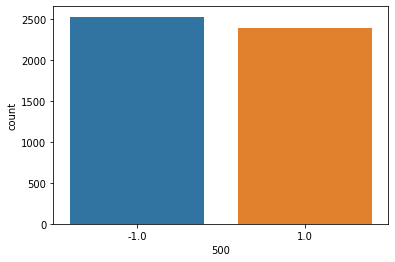

In [7]:
sns.countplot(df.iloc[:, 500])

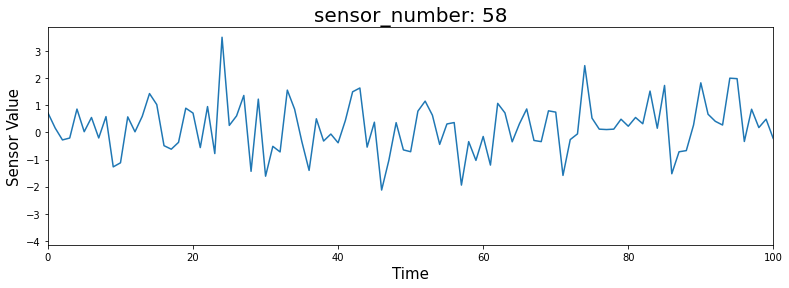

In [8]:
sensor_number = np.random.randint(0, 500)  # 0~500 사이의 랜덤한 정수가 Sensor 번호가 됨

plt.figure(figsize = (13, 4))
plt.title("sensor_number: {}".format(sensor_number), fontsize=20)
plt.plot(df.iloc[:, sensor_number])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Sensor Value", fontsize=15)
plt.xlim(0, 100)
plt.show()

In [9]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,1.000000,0.954423,0.822322,0.622421,0.385677,0.144447,-0.077252,-0.265860,-0.416212,-0.529767,...,-0.012600,-0.018467,-0.023099,-0.025823,-0.025997,-0.023516,-0.018694,-0.012333,-0.005425,-0.001798
1,0.954423,1.000000,0.952987,0.818321,0.618418,0.384680,0.146304,-0.074912,-0.265217,-0.419107,...,-0.009324,-0.016344,-0.022216,-0.026320,-0.027900,-0.026675,-0.022786,-0.016907,-0.010106,-0.000179
2,0.822322,0.952987,1.000000,0.952374,0.818324,0.621339,0.389996,0.151150,-0.073028,-0.267673,...,-0.005471,-0.012955,-0.019416,-0.024362,-0.027024,-0.027015,-0.024339,-0.019493,-0.013519,0.002418
3,0.622421,0.818321,0.952374,1.000000,0.952968,0.821350,0.626552,0.394791,0.153205,-0.074534,...,-0.002424,-0.009199,-0.015078,-0.019842,-0.022891,-0.023831,-0.022574,-0.019336,-0.014971,0.005078
4,0.385677,0.618418,0.818324,0.952968,1.000000,0.953907,0.823774,0.628798,0.395187,0.151540,...,-0.000935,-0.005737,-0.009807,-0.013313,-0.015991,-0.017518,-0.017735,-0.016491,-0.014291,0.006737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,-0.023516,-0.026675,-0.027015,-0.023831,-0.017518,-0.008905,0.000470,0.008713,0.014109,0.015841,...,0.122233,0.366955,0.604706,0.808644,0.949194,1.000000,0.948881,0.807286,0.604859,0.006853
497,-0.018694,-0.022786,-0.024339,-0.022574,-0.017735,-0.010492,-0.002186,0.005520,0.010907,0.013008,...,-0.112377,0.111490,0.354476,0.595339,0.804717,0.948881,1.000000,0.950583,0.815771,0.005096
498,-0.012333,-0.016907,-0.019493,-0.019336,-0.016491,-0.011381,-0.005009,0.001332,0.006073,0.008161,...,-0.306513,-0.120148,0.102057,0.347812,0.594072,0.807286,0.950583,1.000000,0.953320,0.001835
499,-0.005425,-0.010106,-0.013519,-0.014971,-0.014291,-0.011581,-0.007436,-0.002763,0.001066,0.002943,...,-0.453497,-0.309476,-0.122776,0.103133,0.354688,0.604859,0.815771,0.953320,1.000000,-0.001546


## 3. Train/Test Split

In [10]:
X = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, : -1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3444, 500)
(1477, 500)
(3444,)
(1477,)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# RNN, CNN 학습을 위하여 (Data, Feature, Channel)로 확장

X_train_exp = np.expand_dims(X_train, -1)
X_test_exp = np.expand_dims(X_test, -1)
print(X_train_exp.shape)
print(X_test_exp.shape)

(3444, 500, 1)
(1477, 500, 1)


In [14]:
# Label에서 Anomaly -1을 0으로 변환
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

## 4. Train

### 4-1 Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

/Users/nowave/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

lr_accuracy = accuracy_score(y_test, lr_preds)

print("Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_preds))

Accuracy: 0.5016926201760324
              precision    recall  f1-score   support

         0.0       0.52      0.52      0.52       767
         1.0       0.48      0.48      0.48       710

    accuracy                           0.50      1477
   macro avg       0.50      0.50      0.50      1477
weighted avg       0.50      0.50      0.50      1477



<Figure size 504x504 with 0 Axes>

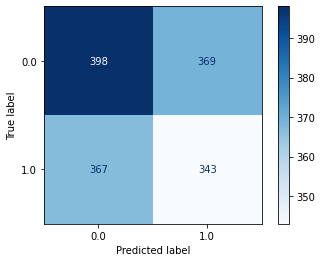

In [19]:
plt.figure(figsize=(7, 7))
plot_confusion_matrix(lr, X_test, y_test,
                      cmap=plt.cm.Blues)
plt.show()

### 4-2 XGBoost

In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_preds)

print("Accuracy:", xgb_accuracy)
print(classification_report(y_test, xgb_preds))

/Users/nowave/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:22:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.7894380501015572
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80       767
         1.0       0.78      0.79      0.78       710

    accuracy                           0.79      1477
   macro avg       0.79      0.79      0.79      1477
weighted avg       0.79      0.79      0.79      1477



<Figure size 504x504 with 0 Axes>

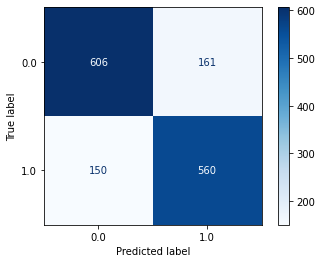

In [22]:
plt.figure(figsize=(7, 7))
plot_confusion_matrix(xgb, X_test, y_test,
                      cmap=plt.cm.Blues)
plt.show()

### 6-3. RNN LSTM

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense

def make_rnn_model():
    model = Sequential()
    model.add(LSTM(units=256, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model

rnn_model = make_rnn_model()

In [76]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

epochs= 100
batch_size = 256

rnn_model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer='adam', 
                  metrics=["sparse_categorical_accuracy"]
                 )

callbacks = [ModelCheckpoint('rnn_best_model.h5', 
                             monitor='val_loss',
                             save_best_only=True),
             ReduceLROnPlateau(
                 monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
                 ),
             EarlyStopping(monitor="val_loss", patience=10, verbose=1)
             ]

history_rnn = rnn_model.fit(
    X_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1
)

Epoch 1/100
10/10 [==============================] - 33s 3s/step - loss: 0.8927 - sparse_categorical_accuracy: 0.5822 - val_loss: 0.6244 - val_sparse_categorical_accuracy: 0.6809
Epoch 2/100
10/10 [==============================] - 31s 3s/step - loss: 0.6082 - sparse_categorical_accuracy: 0.6739 - val_loss: 0.6154 - val_sparse_categorical_accuracy: 0.6615
Epoch 3/100
10/10 [==============================] - 32s 3s/step - loss: 0.5527 - sparse_categorical_accuracy: 0.7104 - val_loss: 0.5890 - val_sparse_categorical_accuracy: 0.6741
Epoch 4/100
10/10 [==============================] - 36s 4s/step - loss: 0.4963 - sparse_categorical_accuracy: 0.7627 - val_loss: 0.5938 - val_sparse_categorical_accuracy: 0.6818
Epoch 5/100
10/10 [==============================] - 33s 3s/step - loss: 0.4495 - sparse_categorical_accuracy: 0.7963 - val_loss: 0.5719 - val_sparse_categorical_accuracy: 0.7041
Epoch 6/100
10/10 [==============================] - 34s 3s/step - loss: 0.4011 - sparse_categorical_accu

In [77]:
rnn_model.evaluate(X_test_exp, y_test)

47/47 [==============================] - 16s 346ms/step - loss: 1.0657 - sparse_categorical_accuracy: 0.7360


[1.0656605958938599, 0.7359512448310852]

In [98]:
rnn_model.load_weights('rnn_best_model.h5')
rnn_preds = rnn_model.predict_classes(X_test_exp)

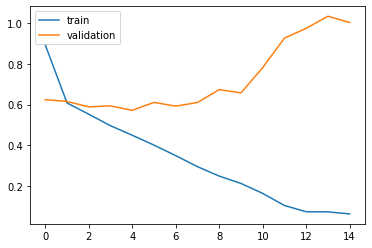

In [99]:
plt.plot(history_rnn.history['loss'], label='train')
plt.plot(history_rnn.history['val_loss'], label='validation')
plt.legend()

plt.show()

In [100]:
_, rnn_accuracy = rnn_model.evaluate(X_test_exp, y_test)

print("Accuracy:", rnn_accuracy)
print(classification_report(y_test, rnn_preds))

47/47 [==============================] - 7s 155ms/step - loss: 0.5641 - sparse_categorical_accuracy: 0.7123
Accuracy: 0.7122545838356018
              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71       767
         1.0       0.69      0.73      0.71       710

    accuracy                           0.71      1477
   macro avg       0.71      0.71      0.71      1477
weighted avg       0.71      0.71      0.71      1477



### 6-4. CNN

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense

def make_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=3,padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation="softmax"))
    return model

cnn_model = make_cnn_model()

In [108]:
epochs = 300
batch_size = 256

callbacks = [
    ModelCheckpoint(
        "cnn_best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

history_cnn = cnn_model.fit(
    X_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/300
10/10 [==============================] - 4s 351ms/step - loss: 0.7304 - sparse_categorical_accuracy: 0.5697 - val_loss: 0.6954 - val_sparse_categorical_accuracy: 0.4613
Epoch 2/300
10/10 [==============================] - 4s 355ms/step - loss: 0.6298 - sparse_categorical_accuracy: 0.6556 - val_loss: 0.6939 - val_sparse_categorical_accuracy: 0.4613
Epoch 3/300
10/10 [==============================] - 4s 372ms/step - loss: 0.5825 - sparse_categorical_accuracy: 0.7050 - val_loss: 0.6952 - val_sparse_categorical_accuracy: 0.4613
Epoch 4/300
10/10 [==============================] - 4s 367ms/step - loss: 0.5399 - sparse_categorical_accuracy: 0.7357 - val_loss: 0.7004 - val_sparse_categorical_accuracy: 0.4613
Epoch 5/300
10/10 [==============================] - 4s 369ms/step - loss: 0.5265 - sparse_categorical_accuracy: 0.7660 - val_loss: 0.7029 - val_sparse_categorical_accuracy: 0.4613
Epoch 6/300
10/10 [==============================] - 4s 364ms/step - loss: 0.4932 - sparse_cate

In [109]:
cnn_model.evaluate(X_test_exp, y_test)

47/47 [==============================] - 1s 13ms/step - loss: 0.2869 - sparse_categorical_accuracy: 0.8998


[0.28688865900039673, 0.8997969031333923]

In [110]:
cnn_model.load_weights('cnn_best_model.h5')
cnn_preds = cnn_model.predict_classes(X_test_exp)

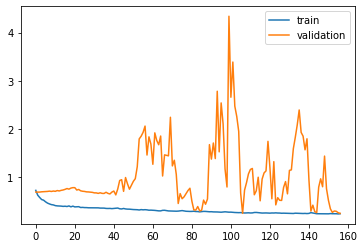

In [111]:
plt.plot(history_cnn.history['loss'], label='train')
plt.plot(history_cnn.history['val_loss'], label='validation')
plt.legend()

plt.show()

In [112]:
_, cnn_accuracy = cnn_model.evaluate(X_test_exp, y_test)

print("Accuracy:", cnn_accuracy)
print(classification_report(y_test, cnn_preds))

47/47 [==============================] - 1s 16ms/step - loss: 0.3062 - sparse_categorical_accuracy: 0.8673
Accuracy: 0.8672986030578613
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       767
         1.0       0.88      0.84      0.86       710

    accuracy                           0.87      1477
   macro avg       0.87      0.87      0.87      1477
weighted avg       0.87      0.87      0.87      1477



In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
n_classes = len(np.unique(y_train))

In [16]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [17]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [21]:
input_shape = X_train_exp.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

model.fit(
    X_train_exp,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(x_test_exp, y_test, verbose=1)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 500, 1)]     0                                            
__________________________________________________________________________________________________
layer_normalization_16 (LayerNo (None, 500, 1)       2           input_3[0][0]                    
__________________________________________________________________________________________________
multi_head_attention_8 (MultiHe (None, 500, 1)       7169        layer_normalization_16[0][0]     
                                                                 layer_normalization_16[0][0]     
__________________________________________________________________________________________________
dropout_18 (Dropout)            (None, 500, 1)       0           multi_head_attention_8[0][0

KeyboardInterrupt: 